In [31]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [32]:
load_dotenv()

True

In [33]:
model = ChatOpenAI()

In [34]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    score: int

In [35]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']
    prompt = f"Create a detailed outline for a blog post titled '{title}'."
    outline = model.invoke(prompt).content
    
    state['outline'] = outline
    return state

In [36]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f"Write a blog post titled '{title}' based on the following outline:\n{outline}"
    content = model.invoke(prompt).content
    
    state['content'] = content
    return state

In [37]:
def give_score(state: BlogState) -> BlogState:
    outline = state['outline']
    content = state['content']
    prompt = f"give a score from 1 to 10 for the following blog post content based on the outline. Dont write anything else just a score\nOutline:\n{outline}\n\nContent:\n{content}\n\nScore:"
    score_str = model.invoke(prompt).content
    state['score'] = int(score_str.strip())
    return state

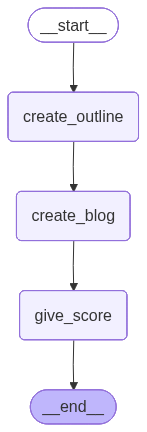

In [38]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('give_score', give_score)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'give_score')
graph.add_edge('give_score', END)
workflow = graph.compile()
workflow

In [39]:
initial_state = {'title': 'Current Pakistani issues'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Current Pakistani issues', 'outline': "I. Introduction\n    A. Brief overview of Pakistan \n    B. Why it's important to discuss current issues in Pakistan\n\nII. Political Issues \n    A. Corruption within government officials\n    B. Political instability \n    C. Civil-military relations \n\nIII. Economic Issues \n    A. Inflation and rising prices \n    B. Unemployment \n    C. Foreign debt and economic crisis\n\nIV. Social Issues\n    A. Gender inequality \n    B. Ethnic and sectarian tensions \n    C. Education system \n\nV. Security Issues \n    A. Terrorism and extremism \n    B. Border issues with neighboring countries \n    C. Internal displacement due to conflicts \n\nVI. Environmental Issues \n    A. Water scarcity \n    B. Air pollution \n    C. Deforestation \n\nVII. Efforts and Solutions \n    A. Government initiatives \n    B. Role of civil society \n    C. International partnerships \n\nVIII. Conclusion\n    A. Recap of main issues discussed \n    B. Importa

In [40]:
print(final_state['outline'])

I. Introduction
    A. Brief overview of Pakistan 
    B. Why it's important to discuss current issues in Pakistan

II. Political Issues 
    A. Corruption within government officials
    B. Political instability 
    C. Civil-military relations 

III. Economic Issues 
    A. Inflation and rising prices 
    B. Unemployment 
    C. Foreign debt and economic crisis

IV. Social Issues
    A. Gender inequality 
    B. Ethnic and sectarian tensions 
    C. Education system 

V. Security Issues 
    A. Terrorism and extremism 
    B. Border issues with neighboring countries 
    C. Internal displacement due to conflicts 

VI. Environmental Issues 
    A. Water scarcity 
    B. Air pollution 
    C. Deforestation 

VII. Efforts and Solutions 
    A. Government initiatives 
    B. Role of civil society 
    C. International partnerships 

VIII. Conclusion
    A. Recap of main issues discussed 
    B. Importance of addressing these issues for the future of Pakistan


In [41]:
print(final_state['content'])

Pakistan, a country located in South Asia, has been grappling with a myriad of issues that have hindered its progress and development. From political instability to economic woes, social challenges, security threats, and environmental concerns, the country faces a host of pressing issues that require immediate attention and action. In this blog post, we will delve into the current Pakistani issues and explore potential solutions to address them.

Political Issues:
One of the major problems plaguing Pakistan is corruption within government officials. From embezzlement of public funds to kickbacks and bribes, corruption has seeped into various levels of governance, undermining the trust of the public in their elected representatives. Political instability is another issue that has plagued Pakistan for decades, with frequent changes in government and power struggles hampering progress and development. Civil-military relations have also been a point of contention, with the military often i

In [42]:
print(final_state['score'])

9
